<a href="https://colab.research.google.com/github/rmanicav/Machine-Learning-Projects/blob/main/LL11_img_gen_diff_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For this assignment, you will explore the use of diffusion models for image generation using the Hugging Face transformers library.

Take any model from https://huggingface.co/stabilityai

Task:

Choose a Diffusion Model: Select a diffusion model available on the Hugging Face Hub. You can explore models from popular libraries like diffusers.

Load the Pipeline: Load the appropriate pipeline for image generation using the chosen diffusion model.

Generate Images: Generate one or more images using the pipeline with different prompts and parameters.

Display and Discuss: Display the generated images and write a brief discussion about:

The model you chose and why.
The prompts and parameters you used for generation.
Your observations about the quality and characteristics of the generated images.

Any challenges or interesting findings you encountered.



model_index.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

config.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/618 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/574 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/655 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/4 [00:00<?, ?it/s]

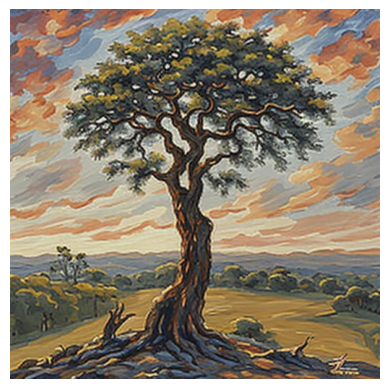

In [5]:
#Checking for best with CPU, by time instead of quality
#stabilityai/sd-turbo
import torch
from diffusers import AutoPipelineForText2Image
import matplotlib.pyplot as plt

# Load SD-Turbo (CPU)
pipe = AutoPipelineForText2Image.from_pretrained(
    "stabilityai/sd-turbo",
    torch_dtype=torch.float32
)

# Optional CPU optimization
pipe.enable_attention_slicing()

prompt = "Sunset"

# SD-Turbo works best with very few steps
image = pipe(
    prompt,
    num_inference_steps=4,   # key feature of sd-turbo
    guidance_scale=0.0       # MUST be 0 for sd-turbo
).images[0]

plt.imshow(image)
plt.axis("off")
plt.show()


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

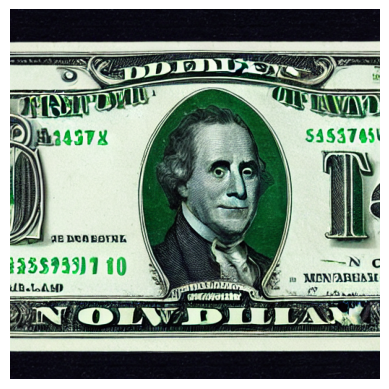

In [2]:
#runwayml/stable-diffusion-v1-5
# CPU version
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt

pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5"
)

prompt = "Green dollar sign"
image = pipe(prompt, num_inference_steps=20).images[0]

plt.imshow(image)
plt.axis("off")
plt.show()


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

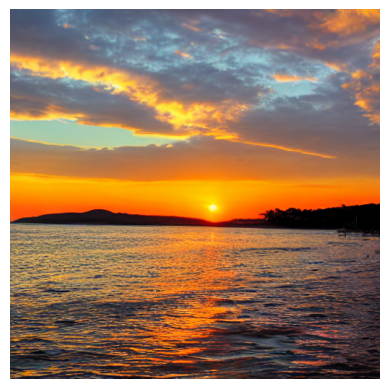

In [6]:
import torch
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt

# Ensure GPU is available
assert torch.cuda.is_available(), "CUDA GPU not available"

# Load the model on GPU
pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16
)
pipe = pipe.to("cuda")

# Prompt
#prompt = "green dollar sign" #simple

prompt ="Sunset" # medium
'''prompt = "a photo of an astronaut riding a horse on mars" #complex
'''

# Generate image
with torch.autocast("cuda"):
    image = pipe(
        prompt,
        num_inference_steps=25,
        guidance_scale=7.5
    ).images[0]

# Display image
plt.imshow(image)
plt.axis("off")
plt.show()



Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

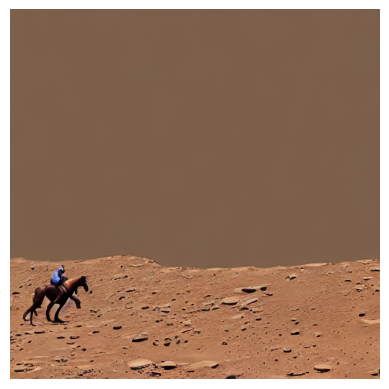

In [7]:
import torch
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt

# Ensure GPU is available
assert torch.cuda.is_available(), "CUDA GPU not available"

# Load the model on GPU
pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16
)
pipe = pipe.to("cuda")

# Prompt
#prompt = "green dollar sign" #simple


prompt = "a photo of an monkey riding a horse on mars" #complex


# Generate image
with torch.autocast("cuda"):
    image = pipe(
        prompt,
        num_inference_steps=25,
        guidance_scale=7.5
    ).images[0]

# Display image
plt.imshow(image)
plt.axis("off")
plt.show()



Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

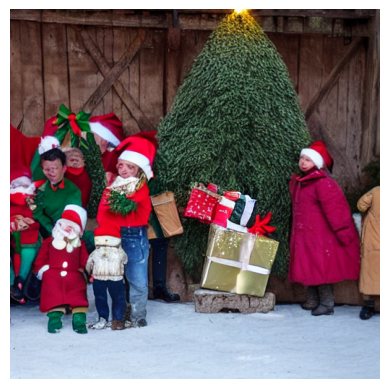

In [8]:
import torch
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt

# Ensure GPU is available
assert torch.cuda.is_available(), "CUDA GPU not available"

# Load the model on GPU
pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16
)
pipe = pipe.to("cuda")

# Prompt
#prompt = "green dollar sign" #simple


prompt = "Christmas party in a village" #complex


# Generate image
with torch.autocast("cuda"):
    image = pipe(
        prompt,
        num_inference_steps=25,
        guidance_scale=7.5
    ).images[0]

# Display image
plt.imshow(image)
plt.axis("off")
plt.show()

Prompts
1) Green Dollar sign - simple
2) Sunset
3) photo of an monkey riding a horse on mars
4) Christmas in a village


#runwayml/stable-diffusion-v1-5
1)Slow better other tried models with CPU

2)Faster with GPU, Quality of images are good

#sd-turbo for cpu
Slow but faster than previous model

Always use GPU for the task of image generation. Arriving on a conclusion of the best model will be based on processing time/Image complexity/Image Quality.
